<a href="https://colab.research.google.com/github/yeisonnaranjo1/Introducci-n-ia-2025-2/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

primero cargamos el archivo kaggle.json que es el api token de kaggle


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"yeisonnaranjogomez","key":"9fd5c79e29cca7267bf71a37336d6407"}'}

Configuramos los permisos y descargamos los archivos

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

!chmod 600 /content/kaggle.json

descargamos los archivos directamente desde kaggle

In [5]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.32GB/s]


descomprimimos el archivo zip

In [7]:
import zipfile

# Descomprime el archivo
with zipfile.ZipFile("udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip", 'r') as zip_ref:
    zip_ref.extractall("udea-ai-4-eng-20252-pruebas-saber-pro-colombia")


listamos los archivos descomprimidos

In [9]:
print(os.listdir('udea-ai-4-eng-20252-pruebas-saber-pro-colombia'))

['train.csv', 'submission_example.csv', 'test.csv']


con panda cargamos el archivo train.csv y con df.head visualizamos las primeras filas para poder ver las categorias

In [11]:
import pandas as pd

df = pd.read_csv('udea-ai-4-eng-20252-pruebas-saber-pro-colombia/train.csv')

# Muestra las primeras filas del DataFrame
from IPython.display import display

display(df.head())


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


miramos informacion general del dataset

In [12]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

y empezamos a contar el numero de estudiantes por las diferentes categorias para tener una lectura de los datos

In [13]:
# Contar el número de estudiantes por programa académico
program_counts = df['E_PRGM_ACADEMICO'].value_counts()
print("Número de estudiantes por programa académico:")
print(program_counts)

Número de estudiantes por programa académico:
E_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
DEPORTE Y ACTIVIDADA FISICA                                   1
QUIMICA Y FARMACIA                                            1
LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES        1
COMUNICACIÓN SOCIAL Y PERIODISMO                              1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64


In [14]:
# Contar el número de estudiantes por departamento
department_counts = df['E_PRGM_DEPARTAMENTO'].value_counts()
print("Número de estudiantes por departamento:")
print(department_counts)

Número de estudiantes por departamento:
E_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64


In [15]:
# Contar el número de estudiantes por valor de matrícula
matricula_counts = df['E_VALORMATRICULAUNIVERSIDAD'].value_counts()
print("Distribución del valor de la matrícula:")
print(matricula_counts)

Distribución del valor de la matrícula:
E_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Menos de 500 mil                             80263
Entre 500 mil y menos de 1 millón            78704
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68014
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            19528
Name: count, dtype: int64


In [16]:
# Contar el número de estudiantes por horas de trabajo
trabajo_counts = df['E_HORASSEMANATRABAJA'].value_counts()
print("Distribución de horas semanales de trabajo:")
print(trabajo_counts)

Distribución de horas semanales de trabajo:
E_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
Name: count, dtype: int64


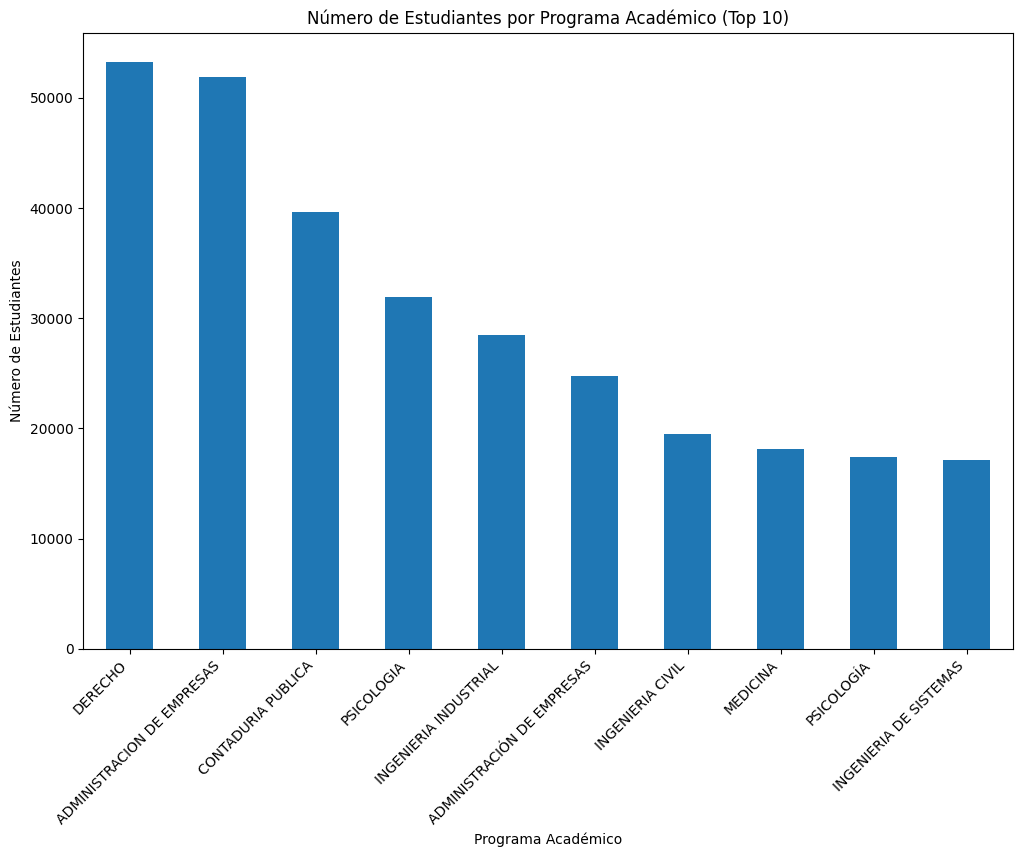

In [17]:
import matplotlib.pyplot as plt

top_programs = program_counts.head(10)  # Muestra solo las 10 categorías más comunes

plt.figure(figsize=(12, 8))  # Aumentar el tamaño del gráfico
top_programs.plot(kind='bar')

plt.title('Número de Estudiantes por Programa Académico (Top 10)')
plt.xlabel('Programa Académico')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas 45 grados y alinearlas a la derecha

plt.show()
